In [713]:
import numpy as np
import pandas as pd
import os
import re

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
init_notebook_mode(connected = True)

from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer

In [195]:
#Get all csv files in current directory
get_filelist = [f for f in os.listdir(os.curdir) if f.endswith(".csv")]

In [196]:
get_filelist

['0_999.csv',
 '1000_2999.csv',
 '12000_13999.csv',
 '14000_15999.csv',
 '16000_17999.csv',
 '18000_19999.csv',
 '20000_22999.csv',
 '23000_25999.csv',
 '26000_28999.csv',
 '29000_31999.csv',
 '3000_5999.csv',
 '32000_34999.csv',
 '35000_37999.csv',
 '38000_39799.csv',
 '39800_44064.csv',
 '6000_8999.csv',
 '9000_11999.csv',
 'first_jobs_scraping.csv',
 'indeed_scraped_jobs.csv',
 'jobs_desc_ratings.csv',
 'uncleaned_indeed_file.csv']

In [197]:
files = get_filelist[:-4]

In [198]:
files

['0_999.csv',
 '1000_2999.csv',
 '12000_13999.csv',
 '14000_15999.csv',
 '16000_17999.csv',
 '18000_19999.csv',
 '20000_22999.csv',
 '23000_25999.csv',
 '26000_28999.csv',
 '29000_31999.csv',
 '3000_5999.csv',
 '32000_34999.csv',
 '35000_37999.csv',
 '38000_39799.csv',
 '39800_44064.csv',
 '6000_8999.csv',
 '9000_11999.csv']

In [199]:
allfile_df = pd.concat([pd.read_csv(f) for f in files])

In [200]:
allfile_df.head()

,Title,Location,Company,Salary,Summary,Description,Review,benefit_rating,comp_rating_overall,culture_rating,job_description,jsecurity_rating,mgmt_rating,wl_bal_rating
0,External Research Coordinator,NaN,Moffitt Cancer Center,NaN,Conducts monthly quality assessments of the OnCore database for data field omissions and timeliness of data entry....,https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0B2_xtGvUALlpjseuNvsBuh7kl09p-yhOsddXFSzwFTUkCdjZlD7a7PR2PdJENNFH8ivK02hERkz37E79TmRaHuvvW9jsfkSDxsqVchO08EhZ7yWPwf_GKFokKl_qm-zO28TGVCE5bfQtP8ANd173EeImR714oG-7IJ6qacrYf2Gb3TczdCEBx8RKm8WuboHJ9mT1eBgjReynt4MY-Q3Npan-0nbnQF6jgGtlV7IweMP1MNnxZ_sCexSY-lY5BWjfLC6UfFtQ1QOnQmXfcq4AZ4dnvEuDlL9ZE7oD9lRDPTed3MH0fmOgP4-wnhTZOwJrX00UNpZkcVM4I0p7OR9Gc9RHktkEQDvsyv_mOM1WFtua1ZjTb7OD4pI9OVdPegq_cKsoQbgk0Nz5edYDjZXfqB_-WNMipcDz5KWv2cEyYp2uL1zzI70Ke5C1edURUm5DV56lNhm9YLkr0eoal51Z0V4GgVekJKdKz4I24iwX8Zsyg2uWvk8yMDNSC8NTrH5yZbX0Nnz6R8GX75aDvf4EiyfYLn0tpxaldGWKmD3od7iNbnGyh3bcquLWxKM-URsYkNmh02ZX_rpBp-Jw8NCHjqcELj1urt_8m4Dri8yXaAsFKBVGvc0dMUlpNodzqxXufSSd7J76PMRsJvQJwAwKio3yZqk3bUh561lAiRTMe-th5wseDCjtSCXOYUYAb-dzo=&vjs=3&p=1&sk=&fvj=0,https://www.indeed.com/cmp/Moffitt-Cancer-Center,3.8,4.0,3.8,"Moffitt Cancer Center is internationally recognized for our focus on personalized cancer care and translational research. The mission of Moffitt is clear, focused, and fully stated in nine words, ""To contribute to the prevention and cure of cancer."" With a tradition of excellence that began with the first patient admission in 1986, dedicated Moffitt physicians, scientists, and staff members have remained committed to excellence in an atmosphere characterized by kindness, caring, and hope. The Protocol Revenue and Regulatory Affairs department is looking for an External Research Coordinator Position Highlights: Responsible for assisting in the development and management of multiple research protocols conducted at multiple research sites locally and nationally. Will oversee external site participation for the Principal Investigator (PI) in his/her clinical trial(s). Create required manuals (e.g., handbook, standard operating procedures) and job aids to assist sites in the prop...",3.6,3.5,3.9
1,Information Security Lead Data Scientist - VP - FL - remote,NaN,Citi,NaN,Serve as a Lead Data Scientist leading and supporting strategic-related initiatives. This Lead Data Scientist will be a member of the Strategic Intelligence...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DPhTdUClI5LzfhAu1yKalG75v0eNLMlcd6maXcCfBUXPBiN5b5QpoQnaagfOAbI_-DOwBiR0b1QX5O7V10mIn9r8yP3R_OUjI5F73hzoiMtO0m5zw2gBGNKlm8WInJaksolWXxf6uIp8A8JOr0WaRldhcqjOSwICc0IgX5fWmn4MGQl3T13FVeT7LLMF0HpDTgcEB8WCq5PfDg-tTJmT2yx_b-FC92o4eCJnW65tUBY1tXkcnvpzeYcn018Hidbuor_ADjMlZBhZOs5BEjOd3RBXV4gijR2v1pgU6i3eYBNHbcTZFAb4IYQcIIRKEYDheEf9hGpK31ZAeDMpXjdGEBS38WOLNS6f0ejPjBzBMNdmlKr-BkwiAew-T-qrgcfz2MwTZvrA_mEvr1_4WF9FJYRDTD8YygsGSOQXow368QMma5omgMDAevKbEwVMczYXibXQwULfqK40_tuck8kc_9ZyRVv592MjReN3neddRWaTlfmA6VIMKWK7Mrv-tFcb-AR4NS0Bi2anoRcij62GalTpDJS9HCtTScD_V_me0pq807dTvJ8dtWWmKdxo22Aie3omi4m-LiQ1ZX_4JdSNTxL_36ujzdzfn0xoGfYqZ0ryFm6wYKIR5gFXj6-lPuxPD0XSFazD_nWy6hM5LmMqZ9MP-xgUQce07t8xyV9rrNnn4BXtMNUwFIh8_X79w9nsEdiFLp2ocCgmn7t5h3qvTFlR2UfHkhvKybkJ_J09UR9kwWOzj0kjEWnkb_x7TxPIzkEL-ygjfSAZ3jnEbUFbn45Y5c436v5oaJp98tkoJVFvGhSqPTfP_cj_Gy-y6ONFjwoWsGj9531milXnjFy2viEx5URxbwzhFbiBFYmhVNHYmBZZM75aGMqj6fxz5Xnr1ex2xnUHDJ7C1XrSC7WCntLZAGpmWPQrAn6BIfpshnAN_ELB...,https://www.indeed.com/cmp/Citi,3.9,3.9,3.8,"Primary Location: United States,Florida,Tampa Education: Bachelor's Degree Job Function: Technology Schedule: Full-time Shift: Day Job Employee Status: Regular Travel Time: Yes, 10 % of the Time Job ID: 18048122 Description About Citi Citi, the leading global bank, has approximately 200 million customer accounts and does business in more than 160 countries and jurisdictions. Citi provides consumers, corporations, governments and institutions with a broad range of financial products and services, including consumer bank

In [201]:
allfile_df.to_csv('indeed_scraped_jobs.csv', index = False)

In [233]:
df = pd.read_csv('indeed_scraped_jobs.csv')

In [234]:
df.shape

(44064, 14)

In [235]:
for c in df:
    print(c, '\n', 'uniques:', df[c].nunique(), '\n', ('*'*40))

Title 
 uniques: 8634 
 ****************************************
Location 
 uniques: 1423 
 ****************************************
Company 
 uniques: 4076 
 ****************************************
Salary 
 uniques: 663 
 ****************************************
Summary 
 uniques: 11136 
 ****************************************
Description 
 uniques: 24154 
 ****************************************
Review 
 uniques: 2318 
 ****************************************
benefit_rating 
 uniques: 37 
 ****************************************
comp_rating_overall 
 uniques: 35 
 ****************************************
culture_rating 
 uniques: 39 
 ****************************************
job_description 
 uniques: 5764 
 ****************************************
jsecurity_rating 
 uniques: 41 
 ****************************************
mgmt_rating 
 uniques: 40 
 ****************************************
wl_bal_rating 
 uniques: 36 
 ****************************************


In [236]:
#find empty values
np.sum(df.isnull())

Title                      0
Location               12233
Company                    2
Salary                 40803
Summary                    1
Description                0
Review                     0
benefit_rating          9596
comp_rating_overall     9596
culture_rating          9596
job_description            2
jsecurity_rating        9596
mgmt_rating             9596
wl_bal_rating           9596
dtype: int64

In [237]:
#Setting all 'None' strings to None obejct type
df.replace('None', np.nan, inplace = True)

In [238]:
np.sum(df.isnull())

Title                      0
Location               12233
Company                    2
Salary                 40803
Summary                    1
Description                0
Review                  9715
benefit_rating          9669
comp_rating_overall     9596
culture_rating          9670
job_description          114
jsecurity_rating        9670
mgmt_rating             9669
wl_bal_rating           9669
dtype: int64

In [239]:
#Removing rows where location is missing
#Removing rows where job description is missing
#Removing summary column as it is a summary of job description
#Removing Description link column and Review link column as both contain links
#Leaving the rest of the columns for now
df = df.loc[df['Location'].notnull(), :]
df = df.loc[df['job_description'].notnull(), :]
df = df.drop(['Summary','Description','Review'] , axis = 1)

In [240]:
#finding empty values 
np.sum(df.isnull())

Title                      0
Location                   0
Company                    0
Salary                 29724
benefit_rating          5710
comp_rating_overall     5637
culture_rating          5711
job_description            0
jsecurity_rating        5711
mgmt_rating             5710
wl_bal_rating           5710
dtype: int64

In [241]:
df.reset_index(drop = True, inplace = True)

In [242]:
df.head(3)

,Title,Location,Company,Salary,benefit_rating,comp_rating_overall,culture_rating,job_description,jsecurity_rating,mgmt_rating,wl_bal_rating
0,Data Scientist,"Tampa, FL",Hillsborough County,"\r\r\r\r\n $67,808 - $108,514 a year",3.6,3.8,3.7,"Hillsborough County is looking for a Data Scientist in Tampa, FL CLICK APPLY NOW TO LEARN MORE ABOUT THIS JOB Wherever and however Hillsborough County fits into your career path, our belief stays the same: don’t just work somewhere, work somewhere you have the ability to create community prosperity. Job Type: Information & Innovation Office Experience: Full-time Salary: $67,808.00 - $108,513.60/year About Us: A great place to live, work and play. Keywords: Our Mission / Professional / Analysis / Reporting / Database / Process Management / Software Development / Web Services / Minimum Qualifications / Work Environment / Skills / Knowledge /",3.6,3.5,3.8
1,Data Scientist,"Tampa, FL",Net2Source,NaN,3.5,3.6,4.2,"Job SummaryPosition: Data ScientistLocation: Tampa, FLType: Contract / Contract-To-HireRequirements:Strong Data Scientist with existing Machine learning backgroundExperience in building out a ML platform to train models that are data relatedNLP experience preferred.Thanks & RegardsKevin ThomasTechnical RecruiterNet2Source Inc.Address: 317 George St., Suite 220, New Brunswick, NJ 08901Tel: 201-340-8700 Ext. 416 | Direct: 201-351-9909Website: www.net2source.comJob Type: ContractExperience:Machine Learning: 3 years (Required)Data Scientist: 4 years (Required)",4.0,3.7,3.8
2,Data Scientist,"Tampa, FL","Hillsborough County, FL","\r\r\r\r\n $67,808 - $108,514 a year",3.6,3.8,3.7,"Desired: Machine LearningRSQLT-SQLPL/SQLMATLABData MiningSASChange ManagementRESTSix Sigma CertificationPythonIntroduction WHY JOIN US Hillsborough County Government provides employees with careers that are both professionally and personally rewarding. With a wide range of independent agencies to choose from, the opportunities within Hillsborough County Government are endless! You are not just an employee within the government, you are an ambassador and business partner making a huge impact within our community that helps shape our future. WHY WE EXIST Our mission is to provide effective quality service at a reasonable cost with courtesy, integrity and accountability in a manner that protects and enhances the quality of life of our diverse population. JOB OVERVIEW The Data Scientist is responsible for modeling and analyzing large, complex data stores using statistical, algorithmic and analytical techniques, methods and procedures. The Data Scientist may also lead large system and...",3.6,3.5,3.8


In [243]:
df.tail(3)

,Title,Location,Company,Salary,benefit_rating,comp_rating_overall,culture_rating,job_description,jsecurity_rating,mgmt_rating,wl_bal_rating
31802,Lab Assistant / Phlebotomist,"Berkeley, CA",University of California Berkeley,\r\r\r\n $22.62 - $25.98 an hour,3.8,4.2,4.1,"About Berkeley The University of California, Berkeley, is one of the world’s most iconic teaching and research institutions. Since 1868, Berkeley has fueled a perpetual renaissance, generating unparalleled intellectual, economic and social value in California, the United States and the world. Berkeley’s culture of openness, freedom and acceptance—academic and artistic, political and cultural—make it a very special place for students, faculty and staff. Berkeley is committed to hiring and developing staff who want to work in a high performing culture that supports the outstanding work of our faculty and students. In deciding whether to apply for a staff position at Berkeley, candidates are strongly encouraged to consider the alignment of the Berkeley Workplace Culture with their potential for success at http://jobs.berkeley.edu/why-berkeley.html. Application Review Date The First Review Date for this job is: 09/06/2018 Departmental Overview UC Berkeley’s University Health...",3.6,3.8,4.0
31803,Senior Data Scientist,"San Francisco, CA",Sano,NaN,NaN,NaN,NaN,"Sano is developing a novel sensor for continuously monitoring blood analytes in a minimally invasive manner. We are looking for a data scientist who will conduct data analysis to support the development of Sano's sensor platform. What you'll be doing: Statistical analysis of experimental and user trial data - starting with ETL (extract, transform and load), including computation of confidence intervals, p-values, t-tests, etc. Fit data to chemical and physical models and analyze results Create analysis procedures that scale easily with both the amount of data being generated in the R&D; group as well as during sensor production Analyze historical database of in vitro and in vivo data Present data and insights to the R&D; and Engineering teams What you'll bring: Strong background in classical statistics (random processes, probability, point/interval estimation, hypothesis testing) and time series analysis Excellent software development skills in Python and using numpy, scipy, pa...",NaN,NaN,NaN
31804,"Scientist, Toxicology","San Francisco, CA",Nektar,NaN,2.7,3.0,3.3,"Participates in the design, implemention and analysis of toxicology studies working with research and development scientists. Responsible for monitoring and implementing toxicology strategies through contract research organizations. Responsibilities incude outsourcing and monitoring toxicology studies, through analysis and reporting. Assists with regulatory submissions. Maintain expertise in development toxicology with focus on immunotoxicology. This position contributes to and supports the company's research and development efforts to create high value therapeutics to address unmet medical needs. Responsibilities: Collaborates with development teams to evaluate the safety profile of candidate molecules. Executes the nonclinical safety evaluation plan to support clinical development of drug candidates through monitoring CRO based toxicology studies . Collaborates writing regulatory filings to support clinical development. Works on complex problems in which analysis of situations ...",2.7,3.0,3.3


In [244]:
df.shape

(31805, 11)

In [245]:
df1 = df.copy()
df2 = df.copy()

In [246]:
print("Number of unique locations:{}".format(df1['Location'].nunique()))
#replacing location by one of the 30 locations queried

Number of unique locations:1423


In [247]:
df1

,Title,Location,Company,Salary,benefit_rating,comp_rating_overall,culture_rating,job_description,jsecurity_rating,mgmt_rating,wl_bal_rating
0,Data Scientist,"Tampa, FL",Hillsborough County,"\r\r\r\r\n $67,808 - $108,514 a year",3.6,3.8,3.7,"Hillsborough County is looking for a Data Scientist in Tampa, FL CLICK APPLY NOW TO LEARN MORE ABOUT THIS JOB Wherever and however Hillsborough County fits into your career path, our belief stays the same: don’t just work somewhere, work somewhere you have the ability to create community prosperity. Job Type: Information & Innovation Office Experience: Full-time Salary: $67,808.00 - $108,513.60/year About Us: A great place to live, work and play. Keywords: Our Mission / Professional / Analysis / Reporting / Database / Process Management / Software Development / Web Services / Minimum Qualifications / Work Environment / Skills / Knowledge /",3.6,3.5,3.8
1,Data Scientist,"Tampa, FL",Net2Source,NaN,3.5,3.6,4.2,"Job SummaryPosition: Data ScientistLocation: Tampa, FLType: Contract / Contract-To-HireRequirements:Strong Data Scientist with existing Machine learning backgroundExperience in building out a ML platform to train models that are data relatedNLP experience preferred.Thanks & RegardsKevin ThomasTechnical RecruiterNet2Source Inc.Address: 317 George St., Suite 220, New Brunswick, NJ 08901Tel: 201-340-8700 Ext. 416 | Direct: 201-351-9909Website: www.net2source.comJob Type: ContractExperience:Machine Learning: 3 years (Required)Data Scientist: 4 years (Required)",4.0,3.7,3.8
2,Data Scientist,"Tampa, FL","Hillsborough County, FL","\r\r\r\r\n $67,808 - $108,514 a year",3.6,3.8,3.7,"Desired: Machine LearningRSQLT-SQLPL/SQLMATLABData MiningSASChange ManagementRESTSix Sigma CertificationPythonIntroduction WHY JOIN US Hillsborough County Government provides employees with careers that are both professionally and personally rewarding. With a wide range of independent agencies to choose from, the opportunities within Hillsborough County Government are endless! You are not just an employee within the government, you are an ambassador and business partner making a huge impact within our community that helps shape our future. WHY WE EXIST Our mission is to provide effective quality service at a reasonable cost with courtesy, integrity and accountability in a manner that protects and enhances the quality of life of our diverse population. JOB OVERVIEW The Data Scientist is responsible for modeling and analyzing large, complex data stores using statistical, algorithmic and analytical techniques, methods and procedures. The Data Scientist may also lead large system and...",3.6,3.5,3.8
3,Data Scientist,"Tampa, FL",BICP,"\r\r\r\r\n $120,000 - $170,000 a year",5.0,5.0,5.0,"BICP, a market leader in Advanced Analytics, Data Science and Innovation Platform services is currently seeking a Data Scientist for an engagement in the Tampa, FL area. Data Scientist will be responsible ffor in-depth analysis of data across the entire organization leading to actionable insights and recommendations. This will involve statistical and non-statistical modeling, simulations, optimization, and analytical testing. Relevant areas include consumer behavior, customer journey, ecommerce, television, marketing, and operations. Example initiatives include marketing mix optimization, airtime optimization, price elasticity estimation, incrementality assessment, and direct-response marketing targeting and effectiveness measurement.Day-to-day TaskConstruct analytic data sets for exploration, modeling, insight generationConduct in-depth data analysis, data and prepare visualizations summarizing key features of the dataDevelop accurate models for forecasting and inferenceDevelop te...",4.5,5.0,5.0
4,Statistical Data Analyst,"Tampa, FL",University of South Florida,"\r\r\r\r\n $51,500 - $60,000 a year",3.6,4.2,4.0,"Position Details Department Number/Name: 0-6144-000 / Molecular Medicine College Division: USF Health- Morsani College of Medicin

# Checkpoint 1

In [248]:
df1.to_csv('checkpoint1.csv', index = False)

In [371]:
df2 = pd.read_csv('checkpoint1.csv')

In [372]:
def get_city_state(df,col):
    df = df.join(df[col].str.split(',', 1, expand=True).rename(columns={0:'City', 1:'State'}))
    df['City'] = df['City'].astype(str)
    df['State'] = df['State'].astype(str)
    df['State'] = [x[0:3] for x in df['State'] if x != None]
    df.drop(['Location'], axis = 1, inplace = True)
    return df

In [373]:
df2 = get_city_state(df2, 'Location')

In [374]:
df2

,Title,Company,Salary,benefit_rating,comp_rating_overall,culture_rating,job_description,jsecurity_rating,mgmt_rating,wl_bal_rating,City,State
0,Data Scientist,Hillsborough County,"\r\r\r\r\r\n $67,808 - $108,514 a year",3.6,3.8,3.7,"Hillsborough County is looking for a Data Scientist in Tampa, FL CLICK APPLY NOW TO LEARN MORE ABOUT THIS JOB Wherever and however Hillsborough County fits into your career path, our belief stays the same: don’t just work somewhere, work somewhere you have the ability to create community prosperity. Job Type: Information & Innovation Office Experience: Full-time Salary: $67,808.00 - $108,513.60/year About Us: A great place to live, work and play. Keywords: Our Mission / Professional / Analysis / Reporting / Database / Process Management / Software Development / Web Services / Minimum Qualifications / Work Environment / Skills / Knowledge /",3.6,3.5,3.8,Tampa,FL
1,Data Scientist,Net2Source,NaN,3.5,3.6,4.2,"Job SummaryPosition: Data ScientistLocation: Tampa, FLType: Contract / Contract-To-HireRequirements:Strong Data Scientist with existing Machine learning backgroundExperience in building out a ML platform to train models that are data relatedNLP experience preferred.Thanks & RegardsKevin ThomasTechnical RecruiterNet2Source Inc.Address: 317 George St., Suite 220, New Brunswick, NJ 08901Tel: 201-340-8700 Ext. 416 | Direct: 201-351-9909Website: www.net2source.comJob Type: ContractExperience:Machine Learning: 3 years (Required)Data Scientist: 4 years (Required)",4.0,3.7,3.8,Tampa,FL
2,Data Scientist,"Hillsborough County, FL","\r\r\r\r\r\n $67,808 - $108,514 a year",3.6,3.8,3.7,"Desired: Machine LearningRSQLT-SQLPL/SQLMATLABData MiningSASChange ManagementRESTSix Sigma CertificationPythonIntroduction WHY JOIN US Hillsborough County Government provides employees with careers that are both professionally and personally rewarding. With a wide range of independent agencies to choose from, the opportunities within Hillsborough County Government are endless! You are not just an employee within the government, you are an ambassador and business partner making a huge impact within our community that helps shape our future. WHY WE EXIST Our mission is to provide effective quality service at a reasonable cost with courtesy, integrity and accountability in a manner that protects and enhances the quality of life of our diverse population. JOB OVERVIEW The Data Scientist is responsible for modeling and analyzing large, complex data stores using statistical, algorithmic and analytical techniques, methods and procedures. The Data Scientist may also lead large system and...",3.6,3.5,3.8,Tampa,FL
3,Data Scientist,BICP,"\r\r\r\r\r\n $120,000 - $170,000 a year",5.0,5.0,5.0,"BICP, a market leader in Advanced Analytics, Data Science and Innovation Platform services is currently seeking a Data Scientist for an engagement in the Tampa, FL area. Data Scientist will be responsible ffor in-depth analysis of data across the entire organization leading to actionable insights and recommendations. This will involve statistical and non-statistical modeling, simulations, optimization, and analytical testing. Relevant areas include consumer behavior, customer journey, ecommerce, television, marketing, and operations. Example initiatives include marketing mix optimization, airtime optimization, price elasticity estimation, incrementality assessment, and direct-response marketing targeting and effectiveness measurement.Day-to-day TaskConstruct analytic data sets for exploration, modeling, insight generationConduct in-depth data analysis, data and prepare visualizations summarizing key features of the dataDevelop accurate models for forecasting and inferenceDevelop te...",4.5,5.0,5.0,Tampa,FL
4,Statistical Data Analyst,University of South Florida,"\r\r\r\r\r\n $51,500 - $60,000 a year",3.6,4.2,4.0,"Position Details Department Number/Name: 0-6144-000 / Molecular Medicine College Division: USF Health- Morsani College of Medicine Salary Plan:

In [377]:
#Including only the top 30 cities in the analysis
city_list = list(df2['City'].value_counts().head(30).index)

In [380]:
df2.loc[df2['State'] == 'NJ']

,Title,Company,Salary,benefit_rating,comp_rating_overall,culture_rating,job_description,jsecurity_rating,mgmt_rating,wl_bal_rating,City,State


In [383]:
#Visualizing jobs in each state
df_statewisejobs = pd.DataFrame(df2['State'].value_counts())
df_statewisejobs

,State
CA,4980
TX,2980
FL,2979
OH,1986
PA,1903
MO,1857
NY,1789
MD,1273
IL,1001
MA,1000


In [ ]:
#Visualizing jobs by nearest big city

In [290]:
#Reading a csv of cities with distance around 50 miles
city_df = pd.read_csv('city_list.csv')
city_df.head(5)

In [292]:
df3 = pd.merge(df2, city_df, how = 'left', left_on = 'City', right_on = 'City')

,City,centre1
0,Abbott Park,Chicago
1,Alameda,San Francisco
2,Albany,New York


In [300]:
df3 = df3.assign(city=df3.centre1.fillna(df3.City))

In [384]:
#Visualizing jobs by nearest big city
df3_citywise = pd.DataFrame(df3['city'].value_counts())

## Checkpoint 2

In [332]:
df3.to_csv('jobs_cleaned1.csv', index = False)

In [333]:
df4 = pd.read_csv('jobs_cleaned1.csv')

In [334]:
df.shape

(31805, 11)

In [335]:
df.head(3)

,Title,Company,Salary,benefit_rating,comp_rating_overall,culture_rating,job_description,jsecurity_rating,mgmt_rating,wl_bal_rating,city
0,Data Scientist,Hillsborough County,"\r\r\r\r\r\r\n $67,808 - $108,514 a year",3.6,3.8,3.7,"Hillsborough County is looking for a Data Scientist in Tampa, FL CLICK APPLY NOW TO LEARN MORE ABOUT THIS JOB Wherever and however Hillsborough County fits into your career path, our belief stays the same: don’t just work somewhere, work somewhere you have the ability to create community prosperity. Job Type: Information & Innovation Office Experience: Full-time Salary: $67,808.00 - $108,513.60/year About Us: A great place to live, work and play. Keywords: Our Mission / Professional / Analysis / Reporting / Database / Process Management / Software Development / Web Services / Minimum Qualifications / Work Environment / Skills / Knowledge /",3.6,3.5,3.8,Tampa
1,Data Scientist,Net2Source,NaN,3.5,3.6,4.2,"Job SummaryPosition: Data ScientistLocation: Tampa, FLType: Contract / Contract-To-HireRequirements:Strong Data Scientist with existing Machine learning backgroundExperience in building out a ML platform to train models that are data relatedNLP experience preferred.Thanks & RegardsKevin ThomasTechnical RecruiterNet2Source Inc.Address: 317 George St., Suite 220, New Brunswick, NJ 08901Tel: 201-340-8700 Ext. 416 | Direct: 201-351-9909Website: www.net2source.comJob Type: ContractExperience:Machine Learning: 3 years (Required)Data Scientist: 4 years (Required)",4.0,3.7,3.8,Tampa
2,Data Scientist,"Hillsborough County, FL","\r\r\r\r\r\r\n $67,808 - $108,514 a year",3.6,3.8,3.7,"Desired: Machine LearningRSQLT-SQLPL/SQLMATLABData MiningSASChange ManagementRESTSix Sigma CertificationPythonIntroduction WHY JOIN US Hillsborough County Government provides employees with careers that are both professionally and personally rewarding. With a wide range of independent agencies to choose from, the opportunities within Hillsborough County Government are endless! You are not just an employee within the government, you are an ambassador and business partner making a huge impact within our community that helps shape our future. WHY WE EXIST Our mission is to provide effective quality service at a reasonable cost with courtesy, integrity and accountability in a manner that protects and enhances the quality of life of our diverse population. JOB OVERVIEW The Data Scientist is responsible for modeling and analyzing large, complex data stores using statistical, algorithmic and analytical techniques, methods and procedures. The Data Scientist may also lead large system and...",3.6,3.5,3.8,Tampa


In [404]:
cities = (pd.DataFrame(df['city'].value_counts().head(30).index)).rename(columns={0:'city'})

In [413]:
#Choosing only those values in top 30 cities
df = df.loc[df['city'].isin(cities['city'])]

In [417]:
#saving results into csv
df.to_csv('jobs_cleaned2.csv', index = False)

In [418]:
df = pd.read_csv('jobs_cleaned2.csv')

In [422]:
df.rename(columns={'Title':'title', 'Company':'company', 'job_description':'description','Salary':'salary',\
                  'wl_bal_rating' : 'worklife_rating', 'comp_rating_overall':'benefit_rating',\
                  'jsecurity_rating': 'jobsecurity_rating', 'mgmt_rating': 'mgmt_rating', \
                   'culture_rating': 'culture_rating', 'comp_rating_overall':'overall_rating'}, inplace = True)

In [425]:
#replace all empty spaces by one empty space
df['description'] = df['description'].apply(lambda x: re.sub('\s+', ' ', x))

In [516]:
#Searching for skillsets in job descriptions
Languages={'R':'(?<=[\W])R(?=[\W])', 'Python':'python', 'Java': 'java', 'Ruby':'ruby','Bash':'bash',\
              'VBA':'vba', 'CSS':'css', 'Javascript':"JAVA-?\s?SCRIPT", 'Scala': 'scala','C':'(?<=[\W])C(?=[\W])',\
             'HTML':'html', 'Perl':'perl', 'SQL':'sql'}

Packages = {'Pandas':'pandas', 'Numpy': 'numpy', 'Scipy':'scipy', 'Scikit Learn':'[Ss]cikit|[Ss]klearn', \
            'Matplotlib':'matplotlib','Seaborn':'seaborn','Plotly':'plotly','Bokeh':'bokeh','NLTK': 'nltk', \
            'ggplot':'ggplot', 'dplyr': 'dplyr'}

Databases={ 'Oracle':'oracle', 'MongoDB':'mongodb', 'MySQL':'mysql', 'PostgreSQL':'postgresql', \
             'SQL Server':'sql server', 'Cassandra':'cassandra'}


Bigdata={'Hadoop': '[Hh]adoop', 'Spark':'[Ss]park', 'AWS':'AWS|[Aa]mazon [Ww]eb [Ss]ervice', 'Hive':'[Hh]ive',\
                    'Pig':'[Pp]ig'}

Softwares={'SAS':'SAS','Matlab':'matlab', 'Tableau':'tableau','TensorFlow':'tensor( ?)flow',\
                          'Excel':'(?<=[\W])Excel(?=[\W])','Stata': 'stata','H2O':'h2o', \
           'BI':'BI|[Bb]usiness [Ii]ntelligence'}

OS={'Linux': 'linux','windows':'windows', 'mac':'mac'}


Skills = {'Machine Learning':'ML|[Mm]achine [lL]earning', 'Data Visualization':'[Vv]isualization',\
            'Deep Learning':'[Dd]eep [Ll]earning','AI':'AI|[Aa]rtificial [Ii]nteligence',\
            'Neural Network':'[Nn]eural ?[Nn]et','NLP':'[Nn]atural [Ll]anguage [Pp]rocessing|NLP',\
            'Predictive Modeling':'[Pp]redictive [Mm]odel', 'Web Scraping':'([Ww]eb)?[Ss]crap',\
            'Decision Tree':'[Tt]ree', 'Random Forest':'[F]orest','Clustering':'[[Cc]luster'}

tool_casesensitive=['R','SAS', 'C', 'SPSS', 'BI', 'C/C++','Data Visualization','Web Scraping']

combined_skillsets = {'Languages':Languages, 'Packages': Packages, 'Databases': Databases, 'Softwares':Softwares,\
                'OS':OS, 'Bigdata':Bigdata, 'Skills':Skills }

skillset_df={}

for element, skill_dict in combined_skillsets.items():
    for skill in skill_dict:
        df[skill]= df.description.str.contains(skill_dict[skill], case = (skill in tool_casesensitive or skill=='Skills'))
    skillset_df[element] = (pd.DataFrame(df.loc[:,skill_dict.keys()].apply(pd.value_counts).\
                                           loc[True].sort_values(ascending=False)))

    
for c in combined_skillsets.keys():
    print('Category',":",c)
    print(pd.DataFrame(skillset_df[c]))
    print('\n')

C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



Category : Languages
            True
Python      7821
SQL         7118
R           6293
Java        5188
Scala       3836
C           3395
Perl        1779
Javascript  1546
CSS          626
HTML         612
Ruby         361
Bash         182
VBA           91


Category : Packages
              True
Scikit Learn   750
Pandas         663
Numpy          468
Scipy          320
NLTK           242
Matplotlib     165
Seaborn        127
ggplot          57
Plotly          35
Bokeh           15
dplyr           11


Category : Databases
            True
Oracle      1674
SQL Server  1264
MySQL        766
Cassandra    577
MongoDB      515
PostgreSQL   301


Category : Softwares
            True
BI          4346
SAS         2709
Excel       2498
Tableau     2060
Matlab      1100
TensorFlow   981
H2O          277
Stata        134


Category : OS
         True
mac      9112
Linux    3039
windows  1695


Category : Bigdata
        True
AWS     4701
Hadoop  2938
Spark   2911
Hive    2178
Pig      716




In [519]:
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

bar_layout = Layout(
    barmode='group',
    height=500,
    width=700,
    xaxis=dict(tickangle=-45),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    legend=dict(x=1)
)

graph_data = []

skills1 = {'Languages':Languages, 'Bigdata': Bigdata, 'OS':OS }

for a, skill_dict in skills1.items():
    graph_data.append(go.Bar(
        x = list(skillset_df[a].index),
        y = list(skillset_df[a][1]),
        name = a))

py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='Skillsets1')

In [522]:
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

bar_layout = Layout(
    barmode='group',
    height=500,
    width=700,
    xaxis=dict(tickangle=-30),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    legend=dict(x=1)
)

graph_data = []

skills2 = {'Skills':Skills, 'Bigdata':Bigdata}

for a, skill_dict in skills2.items():
    graph_data.append(go.Bar(
        x = list(skillset_df[a].index),
        y = list(skillset_df[a][1]),
        name = a))

py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='Skillsets1')

In [527]:
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

bar_layout = Layout(
    barmode='group',
    height=400,
    width=500,
    xaxis=dict(tickangle=-30),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title = 'Softwares'
)

graph_data = []

skills3 = {'Softwares': Softwares}

for a, skill_dict in skills3.items():
    graph_data.append(go.Bar(
        x = list(skillset_df[a].index),
        y = list(skillset_df[a][1]),
        name = a))

py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='Skillsets1')

In [531]:
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,100,15,10)'
)

bar_layout = Layout(
    barmode='group',
    height=400,
    width=500,
    xaxis=dict(tickangle=-40),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title = 'Packages'
)

graph_data = []

skills4 = {'Packages': Packages}

for a, skill_dict in skills4.items():
    graph_data.append(go.Bar(
        x = list(skillset_df[a].index),
        y = list(skillset_df[a][1]),
        name = a))

py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='Skillsets1')

In [ ]:
#########################################################################################

In [534]:
df.to_csv('datacleaning1.csv', index = False)

In [535]:
df = pd.read_csv('datacleaning1.csv')

In [579]:
#Jobs in top 15 cities
jobs_city = pd.DataFrame(df['city'].value_counts().sort_values(ascending=False)).reset_index().head(15)
jobs_city.columns = ['city','count']
jobs_city = df.loc[df['city'].isin(jobs_city.city), :]

In [580]:
jobs_city

,title,company,salary,benefit_rating,overall_rating,culture_rating,description,jobsecurity_rating,mgmt_rating,worklife_rating,...,Python,VBA,CSS,Matplotlib,Seaborn,Decision Tree,Random Forest,Plotly,Bokeh,NLTK
0,Data Scientist,Hillsborough County,"\r\r\r\r\r\r\r\r\n $67,808 - $108,514 a year",3.6,3.8,3.7,"Hillsborough County is looking for a Data Scientist in Tampa, FL CLICK APPLY NOW TO LEARN MORE ABOUT THIS JOB Wherever and however Hillsborough County fits into your career path, our belief stays the same: don’t just work somewhere, work somewhere you have the ability to create community prosperity. Job Type: Information & Innovation Office Experience: Full-time Salary: $67,808.00 - $108,513.60/year About Us: A great place to live, work and play. Keywords: Our Mission / Professional / Analysis / Reporting / Database / Process Management / Software Development / Web Services / Minimum Qualifications / Work Environment / Skills / Knowledge /",3.6,3.5,3.8,...,False,False,False,False,False,False,False,False,False,False
1,Data Scientist,Net2Source,NaN,3.5,3.6,4.2,"Job SummaryPosition: Data ScientistLocation: Tampa, FLType: Contract / Contract-To-HireRequirements:Strong Data Scientist with existing Machine learning backgroundExperience in building out a ML platform to train models that are data relatedNLP experience preferred.Thanks & RegardsKevin ThomasTechnical RecruiterNet2Source Inc.Address: 317 George St., Suite 220, New Brunswick, NJ 08901Tel: 201-340-8700 Ext. 416 | Direct: 201-351-9909Website: www.net2source.comJob Type: ContractExperience:Machine Learning: 3 years (Required)Data Scientist: 4 years (Required)",4.0,3.7,3.8,...,False,False,False,False,False,False,False,False,False,False
2,Data Scientist,"Hillsborough County, FL","\r\r\r\r\r\r\r\r\n $67,808 - $108,514 a year",3.6,3.8,3.7,"Desired: Machine LearningRSQLT-SQLPL/SQLMATLABData MiningSASChange ManagementRESTSix Sigma CertificationPythonIntroduction WHY JOIN US Hillsborough County Government provides employees with careers that are both professionally and personally rewarding. With a wide range of independent agencies to choose from, the opportunities within Hillsborough County Government are endless! You are not just an employee within the government, you are an ambassador and business partner making a huge impact within our community that helps shape our future. WHY WE EXIST Our mission is to provide effective quality service at a reasonable cost with courtesy, integrity and accountability in a manner that protects and enhances the quality of life of our diverse population. JOB OVERVIEW The Data Scientist is responsible for modeling and analyzing large, complex data stores using statistical, algorithmic and analytical techniques, methods and procedures. The Data Scientist may also lead large system and d...",3.6,3.5,3.8,...,True,False,False,False,False,False,False,False,False,False
3,Data Scientist,BICP,"\r\r\r\r\r\r\r\r\n $120,000 - $170,000 a year",5.0,5.0,5.0,"BICP, a market leader in Advanced Analytics, Data Science and Innovation Platform services is currently seeking a Data Scientist for an engagement in the Tampa, FL area. Data Scientist will be responsible ffor in-depth analysis of data across the entire organization leading to actionable insights and recommendations. This will involve statistical and non-statistical modeling, simulations, optimization, and analytical testing. Relevant areas include consumer behavior, customer journey, ecommerce, television, marketing, and operations. Example initiatives include marketing mix optimization, airtime optimization, price elasticity estimation, incrementality assessment, and direct-response marketing targeting and effectiveness measurement.Day-to-day TaskConstruct analytic data sets for exploration, modeling, insight generationConduct in-depth data analysis, data and prepare visualizations summarizing key features of the dataDevelop accurate models for forecasting and inferenceDevelop te...",4.5,5.0,5.0,...,True

In [584]:
#Skills per city
tool_re={'R':'(?<=[\W])R(?=[\W])', 'python':'python', 'SAS':'SAS', 'Matlab':'matlab', 'SQL':'sql', 'Tableau':'tableau',\
          'TensorFlow':'tensor( ?)flow', 'Excel':'(?<=[\W])Excel(?=[\W])', 'Java': 'java', 'Hadoop': 'hadoop',\
          'Linux': 'linux', 'Stata': 'stata', 'Scala': 'scala', 'C':'(?<=[\W])C(?=[\W])', 'Spark':'spark', 'HTML':'html',\
          'AWS':'AWS|[Aa]mazon [Ww]eb [Ss]ervice', 'Ruby':'ruby', 'Bash':'bash', 'H2O':'h2o', 'BI':'BI',\
          'Hive':'hive', 'Pig':'pig', 'Perl':'perl', 'Oracle':'oracle', 'MongoDB':'mongodb',\
          'Scikit Learn':'scikit', 'vba':'vba', 'css':'css', 'Javascript':"JAVA-?\s?SCRIPT",\
         'windows':'windows', 'mac':'mac '}

data = pd.pivot_table(jobs_city,index=['city'],values=tool_re.keys(),aggfunc=[np.mean])
data.columns = data.columns.droplevel()


plot_data = [go.Heatmap( z=data.values.tolist(),
                         y=data.index,
                         x=data.columns,
                        colorscale='Viridis')]

heat_map_layout = Layout(
    margin=go.Margin(
        l=150,
        pad=4
    ),
    height=600,
    width=1000,
    xaxis=dict(tickangle=-45),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    
)

py.offline.iplot(Figure(data=plot_data, layout=heat_map_layout), filename='heatmap_skills_cities')

C:\Anaconda\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:396: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




In [ ]:
#######################################

In [588]:
# NLP
df['corp'] = df['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['corp'] = df['corp'].apply(lambda x: re.sub('[^\w\s]','', x))


stop = stopwords.words('english') + ['andor','race','color','opportunity','marital','status','gender','etc',\
                                     'including', ' sexual', 'well', 'need', 'various', 'orientation', 'charge', \
                                     'de', 'la', 'year', 'experience', 'equal', 'employer', 'national', 'origin',\
                                     'without', 'regard', 'program', 'support', 'use', 'provide', 'appropriate',\
                                     'user', 'closely', 'work', 'role', 'internal', 'external', 'track','record',\
                                     'based', 'required', 'company', 'working', 'ensure', 'ability', 'organization',\
                                     'successful','candidate', 'scientist','computer', 'best','practice',\
                                     'applicant','application', 'within', 'qualified','applicant','training',\
                                     'related', 'field']

df['corp'] = df['corp'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [589]:
stemmer = PorterStemmer()

lemztr = WordNetLemmatizer()

jobs_to_wc = df
#jobs_to_wc = jobs[jobs['country']!='USA']

text = ''.join(jobs_to_wc['corp'])

text = ' '.join([lemztr.lemmatize(word) for word in text.split()])

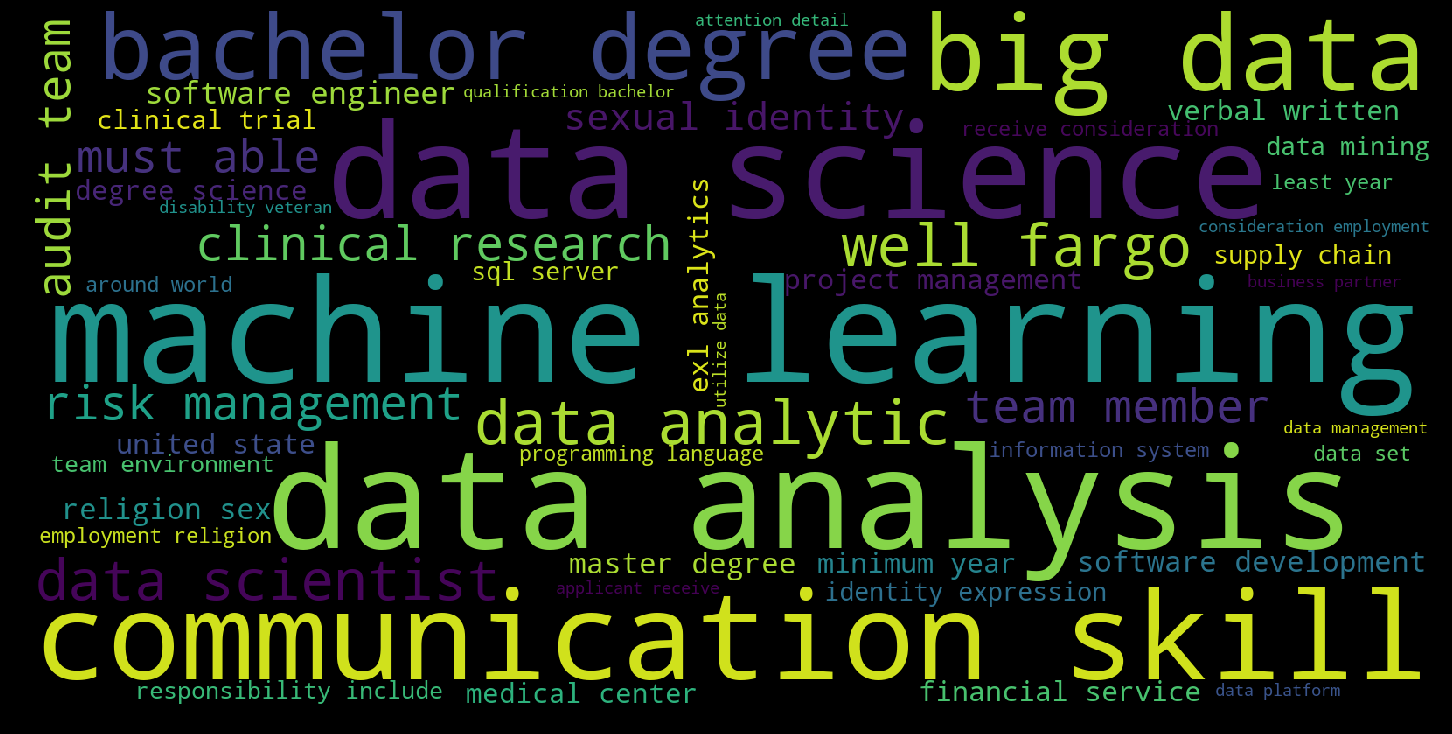

In [590]:
wordcloud = WordCloud(width=1600, height=800, max_words=50).generate(text)
# Open a plot of the generated image.
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [592]:
# degrees

degree_re={'PHD':'(?<=[\W])phd(?=[\W])|ph.d|[Dd]octorate|[Pp]ost graduate','Masters':'[Mm]asters|MS|M.S'\
           ,'Bachelors':'[Bb]achelor|BS|BA|B.A'}

degree_case_sensitive=['Masters','Bachelors']

for degree in degree_re:
    df[degree]=df.description.str.contains(degree_re[degree], case= degree in degree_case_sensitive)
    


In [632]:
#Finding the jobs based on graduate degree 
df_degree = pd.DataFrame(100*(df[['PHD', 'Masters', 'Bachelors']].sum(axis=0)/len(df))).reset_index()
df_degree.columns = ['degree', 'percent']
df_degree.sort_values(by='percent', ascending = False).reset_index(drop = True)

,degree,percent
0,Bachelors,61.878579
1,Masters,38.185040
2,PHD,29.351086


In [650]:
graph_data = []

#py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='Skillsets1')
graph_data = [go.Bar(
            x=df_degree['degree'],
            y=df_degree['percent']
    )]

py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='degree-barplot')

In [654]:
df.to_csv('data_cleaned_0912.csv', index = False)

In [655]:
df = pd.read_csv('data_cleaned_0912.csv')

In [656]:
#is the role related to data science 
role ={'role_relevance': 'ML|[Mm]achine [lL]earning|[Dd]ata [Ss]cien|[Aa]nalytics|[Ss]tatistic'}

for position in role:
    df[position]=df.title.str.contains(role[position])

In [675]:
df_datascience_roles = df.loc[df['role_relevance'], :]
roles = pd.DataFrame(df_datascience_roles['title'].value_counts().head(20)).reset_index()
roles.columns = ['datascience_roles', 'count']

In [694]:
bar_layout = Layout(
    barmode='group',
    height=500,
    width=800,
    xaxis=dict(tickangle=-30),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title = 'Datascience Roles'
)

graph_data = []

#py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='Skillsets1')
graph_data = [go.Bar(
            x=roles['datascience_roles'],
            y=roles['count']
    )]

py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='roles-barplot')


In [705]:
df_datascience_roles[df_datascience_roles.city.str.contains('Charlotte')][df_datascience_roles.company.str.contains('Wells')]\
['title'].value_counts()

C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Data Analytics Manager - DI&A Audit Team                           88
Audit Analytics Leader 2                                           88
Analytic Consultant 5 - Data Scientist - Natural Language Pr...     1
Data Scientist / Analytic Consultant 4                              1
Marketing Data Analyst/ Data Scientist (Analytic Consultant...      1
Name: title, dtype: int64

In [707]:
df_test = df_datascience_roles

In [711]:
df_test.drop_duplicates().shape

(2137, 77)

(5919, 77)

In [695]:
# Top hiring companies for data scientists in the top25 hiring cities
top_jobs_company = df_datascience_roles.groupby(['company']).size().reset_index(name='count').sort_values(by=['count'], ascending=False).head(25)
data = [go.Bar(
            x=top_jobs_company['company'],
            y=top_jobs_company['count']
    )]

py.offline.iplot(Figure(data=data, layout=bar_layout), filename='company-jobs')

In [ ]:
# Number of postings for the top 25 cities
by_city = jobs.groupby(['city']).size().reset_index(name='count')
top_10_cities = by_country_city.sort_values(by=['count'], ascending=False).head(10)
top_10_cities = list(top_10_cities.city)

graph_data = []
i=1
for city in top_10_cities:
    job_count_by_company = jobs[jobs['city']==city].groupby(['company']).size().reset_index(name='count')
    top_3_companies_in_city = job_count_by_company.sort_values(by=['count'], ascending=False).head(3)

    graph_data.append(go.Bar(
        x = list(top_3_companies_in_city['company']+'-'+str(i)),
        y = list(top_3_companies_in_city['count']),
        name = city))
    i+=1

bar_layout = Layout(
    width=1200,
    height=600,
    barmode='group',
    margin=go.Margin(
        b=150,
        pad=4
    ),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='top10_hirin_companies')

In [ ]:
# Normalize salary and degree information

jobs['salary'] = jobs.salary.str.replace('[$|£|₹]','')

conditions = [
    jobs['salary'].str.contains('year', regex=False),
    jobs['salary'].str.contains('month', regex=False),
    jobs['salary'].str.contains('day', regex=False),
    jobs['salary'].str.contains('hour', regex=False)]

multiples = [ 1, 12, 260, 2000 ]
jobs['time_multiplier'] = np.select(conditions, multiples, default=0)

conditions = [
    jobs['country'].str.contains('United Kingdom', regex=False),
    jobs['country'].str.contains('India', regex=False),
    jobs['country'].str.contains('Canada', regex=False),
    jobs['country'].str.contains('Singapore', regex=False),
    jobs['country'].str.contains('Hong Kong', regex=False)
]

multiples = [ 1.3, 0.015, 0.77, 0.73, 0.13 ]
jobs['curency_multiplier'] = np.select(conditions, multiples, default=1.0)

multiples = [ 1.998, 6.4, 2.08, 1.41, 1.31 ]
jobs['col_multiplier'] = np.select(conditions, multiples, default=1.0)

# Impute the degree 
cconditions = [
    jobs['PHD'],
    jobs['Masters'],
    jobs['Bachelors']]

degrees = [ 'PhD', 'Masters', 'Bachelors' ]
jobs['degree'] = np.select(cconditions, degrees, default='Bachelors')

In [ ]:
salary_low = jobs.salary.str.replace('[,$]','').str.extract('(\d{5,})[ -]*',expand=False).astype('float')
salary_high = jobs.salary.str.replace('[,$]','').str.extract('[ -*](\d{5,})',expand=False).astype('float')

jobs['salary_high'] = salary_high * jobs['time_multiplier'] * jobs['curency_multiplier']
jobs['salary_low'] = salary_low * jobs['time_multiplier'] * jobs['curency_multiplier']

In [ ]:
# Uncomment to fill in the high range
jobs.salary_high.fillna(jobs['salary_low'], inplace=True)

jobs_with_sd = jobs[['salary_low','salary_high','city','country','salary','city_country','col_multiplier','degree']].dropna(thresh=5)
jobs_with_sd['salary_average'] = (jobs_with_sd.salary_low + jobs_with_sd.salary_high) / 2
jobs_with_sd['salary_average_col'] = jobs_with_sd['salary_average'] * jobs_with_sd['col_multiplier']

#jobs_with_sd['salary_average'] = jobs_with_sd.salary_high
#jobs_with_sd['salary_average_col'] = jobs_with_sd['salary_average'] * jobs_with_sd['col_multiplier']

jobs_with_sd.sample(50)


#filtered_jobs = jobs_with_sd[jobs_with_sd.country.isin(["USA","United Kingdom","Canada","India"])]


filtered_jobs = jobs_with_sd[jobs_with_sd.city_country.isin(top_25_cities['city_country'])]

In [ ]:
# The countries considered for the salary analysis are the corresponding countries to the top 25 cities except Netherlands and France because there was no salary data
countries = list(filtered_jobs['country'].unique())
countries = [item for item in countries if item not in ["Netherlands","France"]]
graph_data = []

for country in countries:
    cities = filtered_jobs[filtered_jobs['country']==country]['city'].unique()
    cities = [item for item in cities if item not in ["Sunnyvale","Albuquerque"]]
# Change to 'salary_average_col' to get the normalized salary per city   
    for city in cities:
        g_city_salary =(filtered_jobs[filtered_jobs['city']==city]['salary_average_col'])
        g_city_country =(filtered_jobs[filtered_jobs['city']==city]['country'])
        g_city =(filtered_jobs[filtered_jobs['city']==city]['city'])
            
        graph_data.append(go.Box(
                x = g_city_salary,
                y = g_city,
                name = city,
                orientation = 'h',
                customdata = country,
                type = 'box'))


box_layout = Layout(
    yaxis=YAxis(
        zeroline=False
    ),
    height = 1000,
    width = 800,
    boxmode='group',
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig = Figure(data=graph_data, layout=box_layout)

py.offline.iplot(fig, filename='salary_by_city_normalyzed')

In [ ]:
np.array(filtered_jobs['degree']=='PhD') & np.array(filtered_jobs['country']=='USA')


In [ ]:
data = []

for degree in degrees:
    data.append(go.Box(
        # Add this to filter by country:  & np.array(filtered_jobs['country']=='USA')
        y= filtered_jobs[np.array(filtered_jobs['degree']==degree)]['salary_average'],
        name = degree))
    
py.plotly.iplot(Figure(data=data, layout=layout), filename='title_all_not_norm')

In [ ]:
data = []

for country in countries:
    data.append(go.Box(
        y= filtered_jobs[filtered_jobs['country']==country]['salary_average_col'],
        name = country))
    
py.offline.iplot(Figure(data=data, layout=layout), filename='salary_by_country_normalized_by_col')

In [ ]:
data = []

for country in countries:
    data.append(go.Box(
        y= filtered_jobs[filtered_jobs['country']==country]['salary_average'],
        name = country))
    
py.offline.iplot(Figure(data=data, layout=layout), filename='salary_by_country')

## Calculating Salary for a job posting

In [ ]:
df_more = df_more[df_more.Salary != 'None'].drop_duplicates().dropna()

In [ ]:
df_more = df_more[df_more.Salary.str.contains("hour") == False]
df_more = df_more[df_more.Salary.str.contains("month") == False]

In [ ]:
def get_mean_salary(df, col):
    df[col].replace({'\$':''}, regex = True, inplace = True)
    df[col].replace(regex=True,inplace=True,to_replace=r'\D',value=r' ')
    df[col] = df[col].str.strip()
    df[col] = df_more[col].str.replace('   ',',')
    df = df.join(df[col].str.split(',', 1, expand=True).rename(columns={0:'min', 1:'max'}))
    df['min'] = df['min'].str.replace(' ','')
    df['min'] = df['min'].astype('float64')
    df['max'] = df['max'].str.replace(' ','')
    df['max'] = df['max'].astype('float64')
    df.drop(['Salary'], axis = 1, inplace = True)
    df['Salary'] = df[['min', 'max']].mean(axis=1)
    df.drop(['min','max'], axis=1, inplace = True)
    return df